#  Data  Cleaning for Analysis Project_1:


## This project uses data from UK Data Service - UK Cyber Breaches Survey merged 2016-2022.

## The type of breaches from all respondents of the survey were extracted together with the dates.

## Data was cleaned using Excel and Pandas.

## Further cleaning and analysis done using Python Libraries.

## Cleaning .csv file data using Pandas.

### First import the required libraries, pandas, Numpy, Matplotlib, pyreadstat etc.
### Install it in the environment else you will get errors while trying to run the import statements. 
### The versions which work with the version of Python used in this notebook have been installed.

In [61]:

#import pandas as pd
#!pip install numpy==1.23.0
#!pip install scipy


In [62]:
#!pip install pyreadstat==1.2.2

In [63]:
import sys
#!{sys.executable} -m pip install pyreadstat

#!{sys.executable} -m pip install scipy

#!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn


In [64]:
import numpy as np
import pyreadstat as py # used for spss files
import scipy as sc

In [65]:
# import csv file and convert to dataframe

breach_data = pd.read_csv('UK_BreachesCleaned2.csv')
breach_data.head(10)


,uniqser,Date,RansomWare,Malware,DoS,Hacking,Impersonation,Phishing,UnauthorisedAccess,UnauthorisedAccessExternal,Other,UnauthorisedAccessTudents,MiTM,AccountTakeOver
0,1008,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1009,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010,2017-01-01 00:00:00,Computers becoming infected with ransomware,Computers becoming infected with other malware...,NaN,NaN,People impersonating your organisation in emai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1011,2017-01-01 00:00:00,NaN,Computers becoming infected with other malware...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1012,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1013,2017-01-01 00:00:00,Computers becoming infected with ransomware,Computers becoming infected with other malware...,NaN,NaN,People impersonating your organisation in emai...,Phishing attacks,NaN,NaN,NaN,NaN,NaN,NaN
6,1014,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1015,2017-01-01 00:00:00,NaN,Computers becoming infected with other malware...,NaN,NaN,NaN,Phishing attacks,NaN,NaN,NaN,NaN,NaN,NaN
8,1016,2017-01-01 00:00:00,Computers becoming infected with ransomware,Computers becoming infected with other malware...,Denial of service attacks,NaN,NaN,Phishing attacks,NaN,NaN,Any other types of cyber security breaches or ...,NaN,NaN,NaN
9,1017,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# transform the data from the wide format to a long format with only three columns, and drop null values.

breach_long = breach_data.melt(id_vars=['Date', 'uniqser'], var_name='ThreatType', value_name='Record')
breach_long = breach_long.dropna(subset=['Record'])
breach_long = breach_long.set_index('uniqser')


print(breach_long)


                        Date       ThreatType  \
uniqser                                         
1010     2017-01-01 00:00:00       RansomWare   
1013     2017-01-01 00:00:00       RansomWare   
1016     2017-01-01 00:00:00       RansomWare   
1020     2017-01-01 00:00:00       RansomWare   
1031     2017-01-01 00:00:00       RansomWare   
...                      ...              ...   
12169    2022-01-01 00:00:00  AccountTakeOver   
12274    2022-01-01 00:00:00  AccountTakeOver   
12279    2022-01-01 00:00:00  AccountTakeOver   
12331    2022-01-01 00:00:00  AccountTakeOver   
12434    2022-01-01 00:00:00  AccountTakeOver   

                                                    Record  
uniqser                                                     
1010           Computers becoming infected with ransomware  
1013           Computers becoming infected with ransomware  
1016           Computers becoming infected with ransomware  
1020           Computers becoming infected with ransomwar

In [67]:
breach_long.head(15)

,Date,ThreatType,Record
uniqser,,,
1010,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1013,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1016,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1020,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1031,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1032,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1033,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1041,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware
1045,2017-01-01 00:00:00,RansomWare,Computers becoming infected with ransomware


In [68]:
# get total null values in the whole data...
null_counts = breach_long.isna().sum()
print(null_counts)

Date          0
ThreatType    0
Record        0
dtype: int64


In [69]:
# checking individual records, using  threatType 'Hacking' as an example: 

hacking_breach = breach_long[breach_long['ThreatType'] == 'Hacking']

hacking_breach

,Date,ThreatType,Record
uniqser,,,
1052,2017-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
1102,2017-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
1108,2017-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
1127,2017-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
1146,2017-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
...,...,...,...
11698,2022-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
11864,2022-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...
12113,2022-01-01 00:00:00,Hacking,Hacking or attempted hacking of online bank ac...


In [70]:
# number of hacking_incidents
num_hacking_incidents = hacking_breach.shape[0]
print(num_hacking_incidents)

150


In [71]:
# dates of hacking_incidents

print(hacking_breach['Date'])


uniqser
1052     2017-01-01 00:00:00
1102     2017-01-01 00:00:00
1108     2017-01-01 00:00:00
1127     2017-01-01 00:00:00
1146     2017-01-01 00:00:00
                ...         
11698    2022-01-01 00:00:00
11864    2022-01-01 00:00:00
12113    2022-01-01 00:00:00
12261    2022-01-01 00:00:00
12331    2022-01-01 00:00:00
Name: Date, Length: 150, dtype: object


## Running some descriptive statistics and plotting graphs of the frequency of attacks per

## year,  as well getting the highest cyber breach by type in different years.

In [72]:
# Descriptive statistics

breach_long.describe()

# Phishing attacks is the highest cyber breach from 2016-2022.

,Date,ThreatType,Record
count,5074,5074,5074
unique,5,12,12
top,2018-01-01 00:00:00,Phishing,Phishing attacks
freq,2135,1848,1848


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# plotting some graphs to show data

# first convert dates to datetime format...

breach_long['Date'] = pd.to_datetime(breach_long['Date'])
                                     
# Extract the year from the 'Date' column and create a new column 'Year'

breach_long['Year'] = breach_long['Date'].dt.year

# Count the frequencies of each threat type per year

breach_counts = breach_long.groupby(['Year', 'ThreatType']).size().reset_index(name='Frequency')



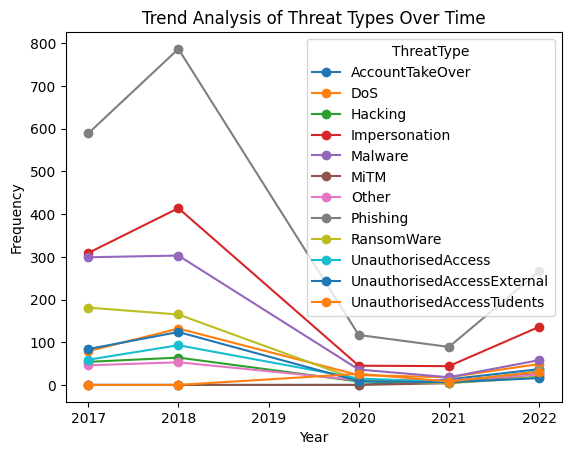

In [75]:
# Trend analysis, finding the threat type frequencies over the years..

 # Create a new column for the year

# Group by 'Year' and 'ThreatType' and count the number of each 'ThreatType' in each year

threat_counts = breach_long.groupby(['Year', 'ThreatType']).size().reset_index(name='Frequency')

# Pivot the data so that 'ThreatType' values become column headers and the values are their frequencies

breach_pivot = threat_counts.pivot(index='Year', columns='ThreatType', values='Frequency')

# Fill NaN values with 0 (assuming that NaN means that there were no threats of that type in that year)

breach_pivot = breach_pivot.fillna(0)

# Plot the trends
breach_pivot.plot(kind='line', marker='o')
plt.title('Trend Analysis of Threat Types Over Time')
plt.ylabel('Frequency')
plt.show()

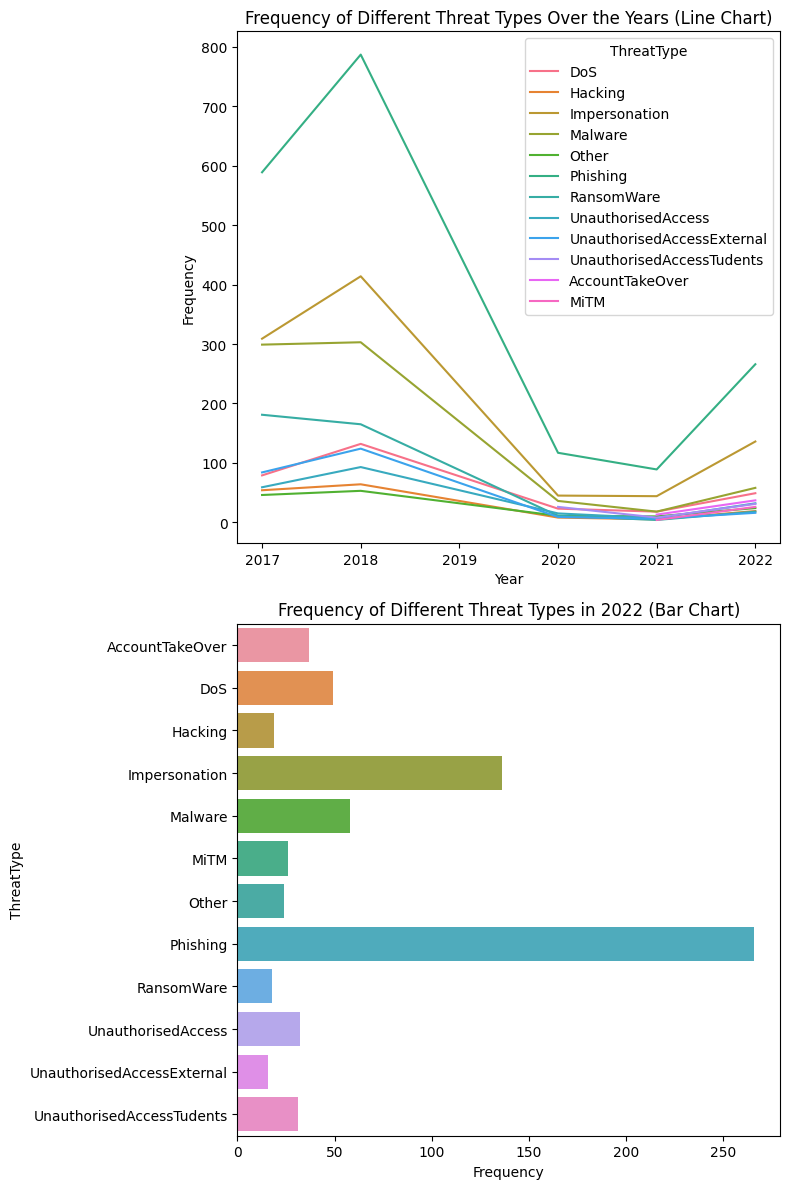

In [76]:

# Create a figure with two subplots: one for the line chart, one for the bar chart

fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot line chart
sns.lineplot(data=breach_counts, x='Year', y='Frequency', hue='ThreatType', ax=axs[0])
axs[0].set_title('Frequency of Different Threat Types Over the Years (Line Chart)')


# Put year interested in...

breach_counts_2022 = breach_counts[breach_counts['Year'] == 2022]
sns.barplot(data=breach_counts_2022, x='Frequency', y='ThreatType', ax=axs[1])
axs[1].set_title('Frequency of Different Threat Types in 2022 (Bar Chart)')

# Display the figure with both subplots
plt.tight_layout()
plt.show()


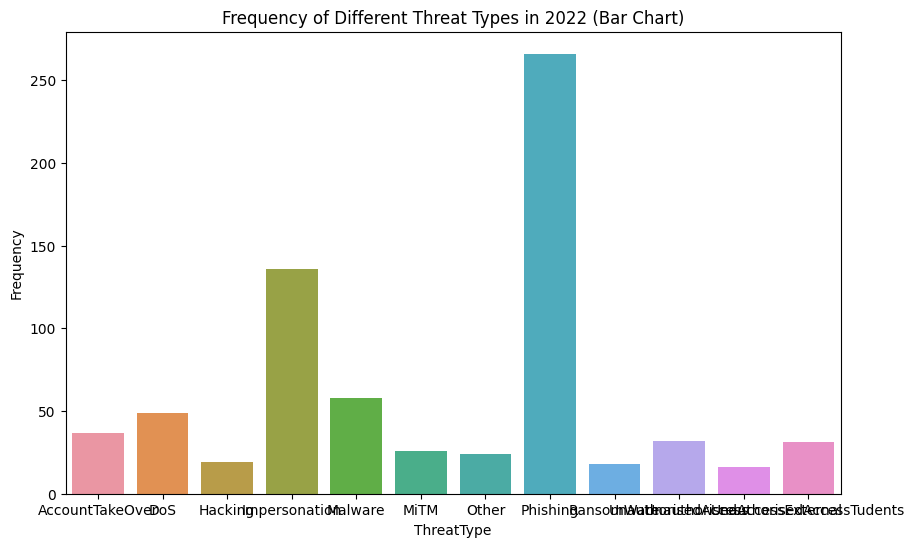

In [77]:
# Change the bar plots to vertical bars by swapping the axes:

# fig, axs = plt.subplots(2)

breach_counts_2022 = breach_counts[breach_counts['Year'] == 2022]

plt.figure(figsize=(10, 6))

sns.barplot(data=breach_counts_2022, y='Frequency', x='ThreatType') 
plt.title('Frequency of Different Threat Types in 2022 (Bar Chart)')

plt.show()


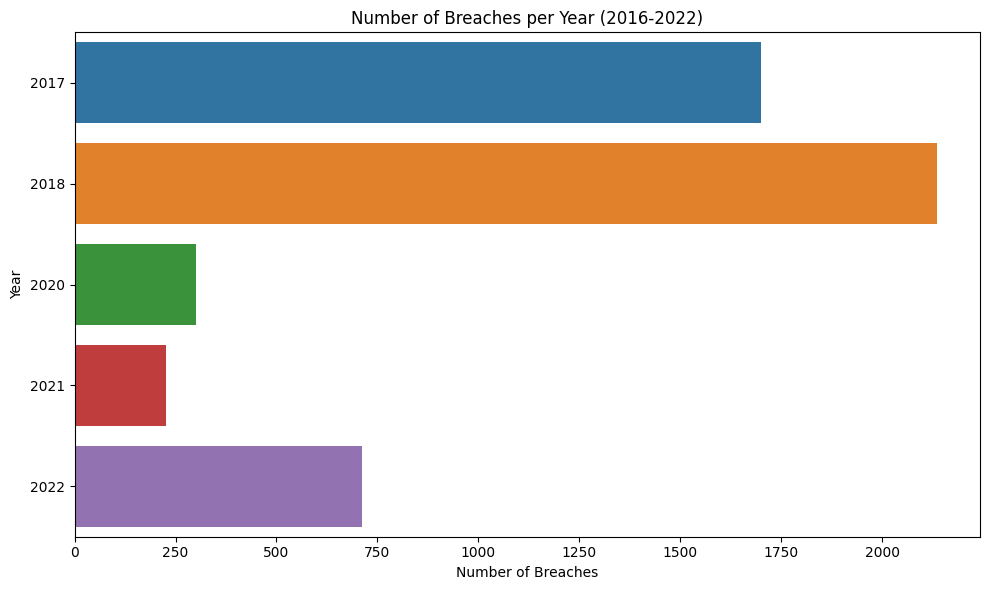

In [78]:
# To get cyber incidents per year plotting as a bar plots:
# Extract the year from the date

breach_long['Year'] = breach_long['Date'].dt.year

# Count the number of breaches per year
breach_counts = breach_long['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=breach_counts.values, y=breach_counts.index.astype('str'))
plt.title('Number of Breaches per Year (2016-2022)')
plt.xlabel('Number of Breaches')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [79]:

# Finding the year with the maximum number of breaches, to check if it corresponds to the graph above:

# Extract the year from the date
breach_long['Year'] = breach_long['Date'].dt.year

# Count the number of breaches per year

breach_counts = breach_long.groupby('Year').size()

# Find the year with the maximum number of breaches

max_breaches_year = breach_counts.idxmax() 

# Here, we use the idxmax function to find the index (in this case, the year) of the maximum value in breach_counts. 

# This gives us the year with the highest number of breaches.

max_breaches_count = breach_counts.max()

print(f"The year with the highest number of breaches is {max_breaches_year} with {max_breaches_count} breaches.")


The year with the highest number of breaches is 2018 with 2135 breaches.


In [80]:
# find the type of breach that was highest in the year 2018

# Filter data to include only 2018 breaches

breach_2018 = breach_long[breach_long['Year'] == 2018]

# Count the number of each type of breach
breach_counts_2018 = breach_2018['ThreatType'].value_counts()

# Find the type of breach with the highest count
max_breach_type = breach_counts_2018.idxmax()
max_breach_count = breach_counts_2018.max()

print(f"The type of breach that was highest in 2018 was '{max_breach_type}' with {max_breach_count} occurrences.")


The type of breach that was highest in 2018 was 'Phishing' with 787 occurrences.


## Statistical calculations:
### Growth Rate and Anomaly Detection


In [81]:
# Growth rate calculation: This calculates the increase of attacks over the years:

# Assuming 'breach_long' is your DataFrame and 'Date' column is of datetime type

breach_long['Year'] = breach_long['Date'].dt.year  # Create a new column for the year

# Group by 'Year' and 'ThreatType' and count the number of each 'ThreatType' in each year

threat_counts = breach_long.groupby(['Year', 'ThreatType']).size().reset_index(name='Frequency')

# Pivot the data so that 'ThreatType' values become column headers and the values are their frequencies
breach_pivot = threat_counts.pivot(index='Year', columns='ThreatType', values='Frequency')

# Calculate the year-over-year growth rate

growth_rate = breach_pivot.pct_change()

# Print the growth rate

# print(growth_rate)

growth_rate

ThreatType,AccountTakeOver,DoS,Hacking,Impersonation,Malware,MiTM,Other,Phishing,RansomWare,UnauthorisedAccess,UnauthorisedAccessExternal,UnauthorisedAccessTudents
Year,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,0.670886,0.185185,0.339806,0.013378,NaN,0.152174,0.336163,-0.088398,0.576271,0.476190,NaN
2020,NaN,-0.825758,-0.875000,-0.891304,-0.881188,NaN,-0.792453,-0.851334,-0.933333,-0.838710,-0.927419,NaN
2021,NaN,-0.217391,-0.375000,-0.022222,-0.500000,NaN,-0.090909,-0.239316,-0.636364,-0.533333,-0.333333,-0.692308
2022,1.846154,1.722222,2.800000,2.090909,2.222222,5.5,1.400000,1.988764,3.500000,3.571429,1.666667,2.875000


In [82]:
# Find the maximum growth rate and the corresponding ThreatType

max_growth_rate = growth_rate.max().max()  # Find the maximum value in the entire DataFrame
max_growth_threat = growth_rate.max().idxmax()  # Find the column (ThreatType) of the maximum value

print("The threat type with the highest growth rate is:", max_growth_threat)
print("The highest growth rate is:", max_growth_rate)


The threat type with the highest growth rate is: MiTM
The highest growth rate is: 5.5


In [83]:

# Anomaly detection:

# Calculate the mean and standard deviation of each column
mean = breach_pivot.mean()
std_dev = breach_pivot.std()

# Any point that is more than 3 standard deviations away from the mean is considered an anomaly
anomalies = (np.abs(breach_pivot - mean) > 2*std_dev)

# Print anomalies
# print(anomalies)
anomalies
# No anomalies detected

ThreatType,AccountTakeOver,DoS,Hacking,Impersonation,Malware,MiTM,Other,Phishing,RansomWare,UnauthorisedAccess,UnauthorisedAccessExternal,UnauthorisedAccessTudents
Year,,,,,,,,,,,,
2017,False,False,False,False,False,False,False,False,False,False,False,False
2018,False,False,False,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False,False,False,False
2021,False,False,False,False,False,False,False,False,False,False,False,False
2022,False,False,False,False,False,False,False,False,False,False,False,False


### ***Dataset: UK cyber breaches survey(merged) 2016-2023***

### ***Data source : UK Data Service*** 

#### [1]  Department for Digital, Culture, Media and Sport. (2022). Cyber Security Breaches Survey: 
#### Combined Dataset, 2016-2022. [data collection]. UK Data Service. SN: 8971, DOI: 10.5255/UKDA-SN-8971-1


   



 #### * Data was cleaned using excel and Python.
 #### * Responses to type of attacks was extracted and column headers changed.
 #### * There was little or no response regarding attacks for 2016 according to the raw data.
 #### * The data was initially collected for building an ARIMA model but, the instances are too few.
 #### * The above code can be replicated without permission, remove the hashtags to install libraries if not already installed.
 #### * Python version : > 3.10 





## Chinyere Ugorji &copy;  2023  
